In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.svm import SVC

In [2]:
# Reading data
df = pd.read_csv('Seed_Data.csv')
df

,A,P,C,LK,WK,A_Coef,LKG,target
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,0
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,0
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,0
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,0
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,0
...,...,...,...,...,...,...,...,...
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,2
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,2
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,2
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,2


In [3]:
#Check if the date is clean
df.isnull().sum()

A         0
P         0
C         0
LK        0
WK        0
A_Coef    0
LKG       0
target    0
dtype: int64

In [4]:
#check if there is any duplication
df.duplicated().sum()

0

In [5]:
#removing class 2 Because our SVM binary production
condition = df['target'].isin([0,1])
df = df[condition]
df

,A,P,C,LK,WK,A_Coef,LKG,target
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,0
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,0
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,0
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,0
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,0
...,...,...,...,...,...,...,...,...
135,15.38,14.66,0.8990,5.477,3.465,3.600,5.439,1
136,17.36,15.76,0.8785,6.145,3.574,3.526,5.971,1
137,15.57,15.15,0.8527,5.920,3.231,2.640,5.879,1
138,15.60,15.11,0.8580,5.832,3.286,2.725,5.752,1


In [6]:
#SVM class
class SVM:
    def __init__(self):
        self.alpha = None
        self.w = None
        self.b = None

    def fit(self, X, y):
        # Convert labels to -1 and 1
        y_ = np.where(y <= 0, -1, 1)

        n_samples = X.shape[0]

        # Initialize alpha values to zero
        self.alpha = np.zeros(n_samples)

        # Calculate the Gram matrix
        K = np.dot(X, X.T)
        # Solve for alphas using least squares
        self.alpha, _, _, _ = np.linalg.lstsq(K, y_, rcond=None)

        # Calculate the weight vector w
        self.w = np.sum(self.alpha[:, None] * y_[:, None] * X, axis=0)
        # Weight vector w = sum(alpha_i * y_i * x_i)

        # Calculate the bias
        support_vector_indices = np.where(self.alpha > 1e-5)[0]
        self.b = np.mean([y_[i] - np.dot(self.w, X[i]) for i in support_vector_indices])
        # Bias b = mean(y_i - w^T x_i) for support vectors

    def predict(self, X):
        # Calculate the decision function and classify based on the sign
        decision_function = np.dot(X, self.w) + self.b
        # Decision function f(x) = x^T w + b

        return np.where(decision_function >= 0, 1, 0)


In [7]:
#EDA

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 140 entries, 0 to 139
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       140 non-null    float64
 1   P       140 non-null    float64
 2   C       140 non-null    float64
 3   LK      140 non-null    float64
 4   WK      140 non-null    float64
 5   A_Coef  140 non-null    float64
 6   LKG     140 non-null    float64
 7   target  140 non-null    int64  
dtypes: float64(7), int64(1)
memory usage: 9.8 KB


In [9]:
df.describe()

,A,P,C,LK,WK,A_Coef,LKG,target
count,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000
mean,16.334357,15.215000,0.881794,5.828043,3.461021,3.156101,5.553907,0.500000
std,2.406400,1.099006,0.015887,0.406740,0.282686,1.272003,0.534693,0.501795
min,11.230000,12.630000,0.839200,4.902000,2.850000,0.765100,4.519000,0.000000
25%,14.362500,14.335000,0.871450,5.519000,3.239250,2.220000,5.095500,0.000000
50%,16.130000,15.130000,0.881850,5.808500,3.463500,2.973000,5.530500,0.500000
75%,18.720000,16.205000,0.894250,6.146750,3.693250,4.022000,5.976250,1.000000
max,21.180000,17.250000,0.918300,6.675000,4.033000,6.685000,6.550000,1.000000


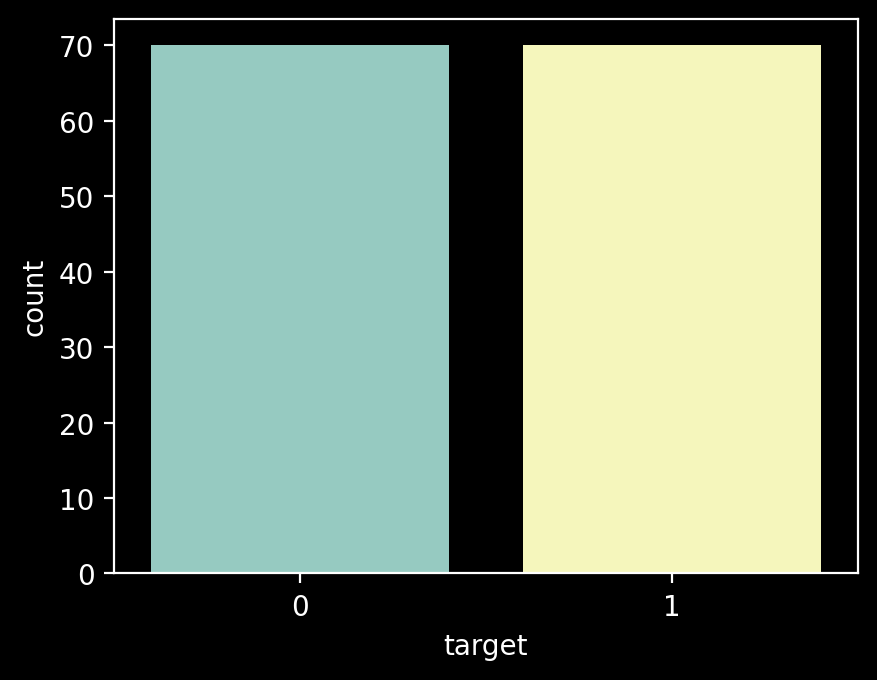

In [10]:
#display target count
sns.countplot(data=df,x='target');

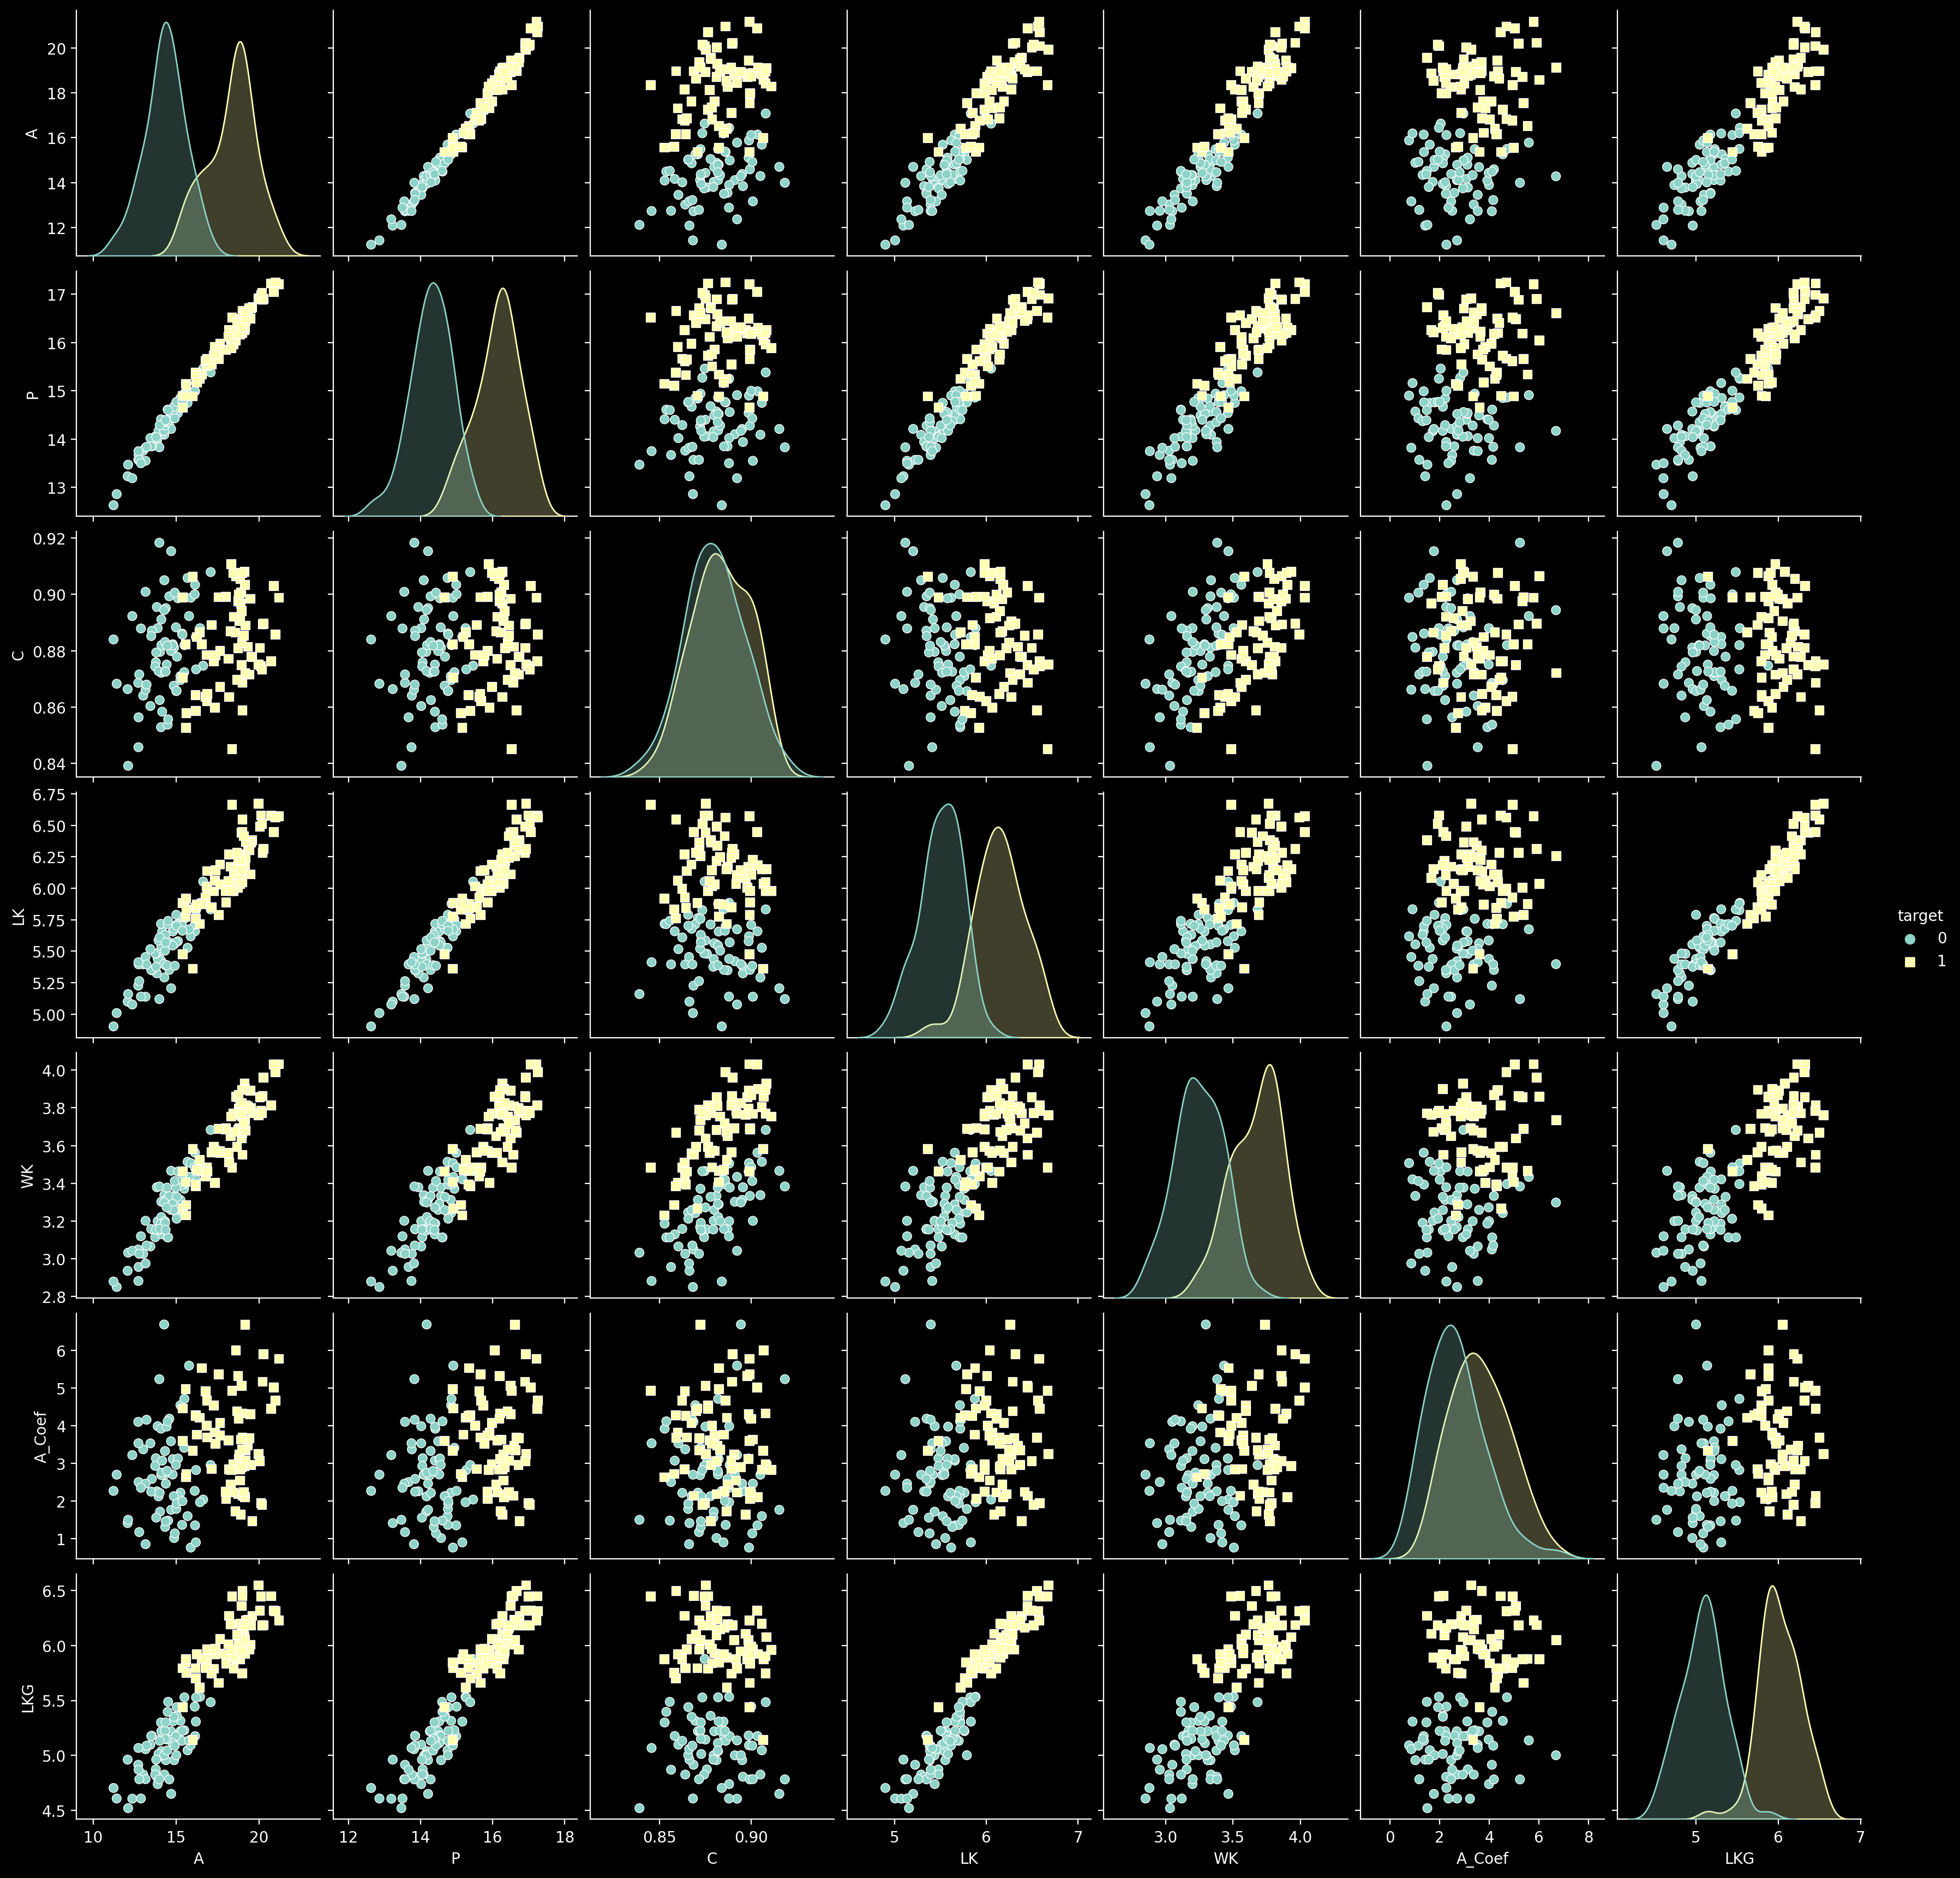

In [11]:
#Let's see if the data is linearly separable. The SVM class we wrote is simple and only works with linearly separable data.
sns.pairplot(df,hue='target',diag_kind='kde',markers=['o','s']);

In [12]:
#as we can see the data is linearly separable

In [13]:
#Training and Testing split
x = df.drop('target',axis=1)
y = df['target']
x = np.array(x)
y = np.array(y)

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=23)

In [15]:
x_train.shape

(112, 7)

In [16]:
x_test.shape

(28, 7)

In [17]:
y_train.shape

(112,)

In [18]:
y_test.shape

(28,)

In [19]:
#initialise the model
SVM = SVM()

In [20]:
#model training
SVM.fit(x_train,y_train)

In [21]:
#model testing
predictions = SVM.predict(x_test)
predictions = pd.DataFrame(predictions,columns=['Predictions'])
predictions['Actual'] = y_test
predictions

,Predictions,Actual
0,1,1
1,0,0
2,0,0
3,1,1
4,1,1
5,0,0
6,1,1
7,0,1
8,0,0
9,0,0


In [22]:
report = classification_report(predictions['Actual'],predictions['Predictions'])
print('Classification Report for SVM manually:')
print(report)

Classification Report for SVM manually:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        18
           1       1.00      0.90      0.95        10

    accuracy                           0.96        28
   macro avg       0.97      0.95      0.96        28
weighted avg       0.97      0.96      0.96        28



In [23]:
#initialise SVM by scikit-learn
SVM = SVC()

In [24]:
#Model training
SVM.fit(x_train,y_train)

SVC()

In [25]:
#model testing
predictions['by scikit learn'] = SVM.predict(x_test)
predictions

,Predictions,Actual,by scikit learn
0,1,1,1
1,0,0,0
2,0,0,0
3,1,1,1
4,1,1,1
5,0,0,0
6,1,1,1
7,0,1,1
8,0,0,0
9,0,0,0


In [26]:
report = classification_report(predictions['Actual'],predictions['by scikit learn'])
print('Classification Report for SVM by scikit learn')
print(report)

Classification Report for SVM by scikit learn
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00        10

    accuracy                           1.00        28
   macro avg       1.00      1.00      1.00        28
weighted avg       1.00      1.00      1.00        28

